# import des librairies

In [4]:
import scipy.misc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from skimage.io import imread, imshow
import pytesseract
from os import listdir
from os.path import isfile, join
import numpy
import cv2
import argparse
from PIL import Image
import glob 

# Definition de la BDD

In [5]:
df = pd.DataFrame(columns=['CIN number','First Name','Last Name','Year of Birth',
                           'Body','Fiscal Power','Empty weight','Number of axies',
                           'Registration right','Registration left','Constructor','Commercial Type',
                           'Serial Number','Release','Type of constructor'])
df

,CIN number,First Name,Last Name,Year of Birth,Body,Fiscal Power,Empty weight,Number of axies,Registration right,Registration left,Constructor,Commercial Type,Serial Number,Release,Type of constructor


In [7]:
def numberinstring(FP):
    num = ""
    for c in FP:
        if c.isdigit():
            num = num + c
    return num


## Segmentation (Identity Card)

In [8]:
from cv2 import cv2
import pytesseract
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [9]:
def boucle (x) :
    imS = cv2.imread('C:/Users/Chirine/Desktop/Projet DS/baseimage/images_finals/CIN/CIN'+ x +'.jpg')
    imageFrontCG = cv2.imread('C:/Users/Chirine/Desktop/Projet DS/baseimage/images_finals/CG_Front/'+x+'CG_F.jpg')
    imageBackCG = cv2.imread('C:/Users/Chirine/Desktop/Projet DS/baseimage/images_finals/CG_Back/'+x+'CG_B.jpg')
    return imS, imageFrontCG,imageBackCG

In [10]:
imS, imageFrontCG,imageBackCG = boucle('40')

(400, 600, 3)

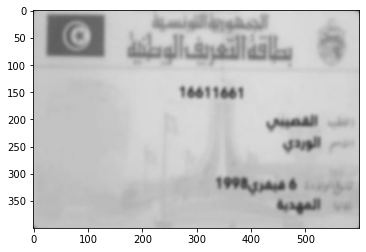

In [11]:
imS = cv2.resize(imS, (600,400))                    # Resize image
plt.imshow(imS)
imS.shape

In [12]:
img = imS
img_copy = imS.copy()
img_canny = cv2.Canny(img_copy, 50, 100, apertureSize = 3)
img_hough = cv2.HoughLinesP(img_canny, 1, math.pi / 180, 100, minLineLength = 100, maxLineGap = 10)

In [13]:
img_hough = cv2.HoughLinesP(img_canny, 1, math.pi / 180, 100, minLineLength = 100, maxLineGap = 10)

In [14]:
(x, y, w, h) = (np.amin(img_hough, axis = 0)[0,0], np.amin(img_hough, axis = 0)[0,1], np.amax(img_hough, axis = 0)[0,0] - np.amin(img_hough, axis = 0)[0,0], np.amax(img_hough, axis = 0)[0,1] - np.amin(img_hough, axis = 0)[0,1])
img_roi = img_copy[y:y+h,x:x+w]

In [15]:
#(height, width) = imS.shape
img_roi_copy = imS.copy()
dim_mrz = (x, y, w, h) = (230, 130, 180, 45)

#dim_mrz = (x, y, w, h) = (1, round(height*0.9), width-3, round(height-(height*0.9))-2)
img_roi_copy = cv2.rectangle(img_roi_copy, (x, y), (x + w ,y + h),(0,0,0),2)

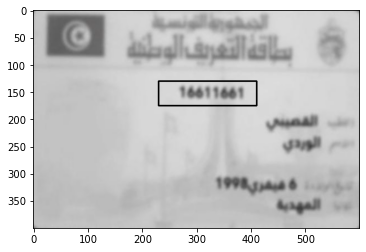

In [16]:
plt.imshow(img_roi_copy)


In [17]:
img_mrz = imS[y:y+h, x:x+w]
img_mrz =cv2.GaussianBlur(img_mrz, (3,3), 0)
ret, img_mrz = cv2.threshold(img_mrz,127,255,cv2.THRESH_TOZERO)

In [18]:
Cin_num = pytesseract.image_to_string(img_mrz, lang='eng')

In [19]:
Cin_num

')\n‘166\n‘eo\n'

In [20]:
characters = "\n"

for x in range(len(characters)):
    Cin_num = Cin_num.replace(characters[x],"")
Cin_num

')‘166‘eo'

In [21]:
dim_lastname_chi = (x, y, w, h) = (380, 180, 160, 60)
img_lastname_chi = imS[y:y+h, x:x+w]
img_lastname_chi = cv2.GaussianBlur(img_lastname_chi, (3,3), 0)
ret, img_lastname_chi = cv2.threshold(img_lastname_chi,127,255,cv2.THRESH_TOZERO)


<font color=#6A098 size = 5 face="Georgia"> We tried to limit and precise the area where we are going to extract the last name.

In [22]:
img_roi_copy = imS.copy()
img_roi_copy = cv2.rectangle(img_roi_copy, (x, y), (x + w ,y + h),(0,0,0),2)

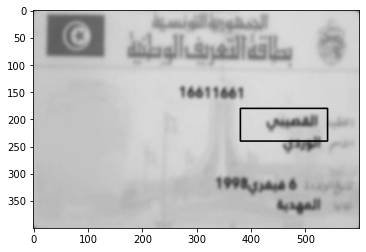

In [23]:
plt.imshow(img_roi_copy)

In [24]:
#Assign the variable "lastname" and display
#we do the same for the first name and birth date
LName = pytesseract.image_to_string(img_lastname_chi, lang='ara')

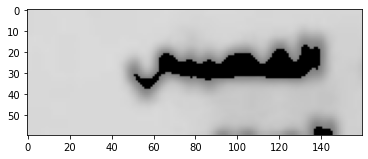

In [25]:
plt.imshow(img_lastname_chi)

In [26]:
LName

''

In [27]:
dim_firstname_chi = (x, y, w, h) = (380, 240, 160, 36)
img_firstname_chi = imS[y:y+h, x:x+w]
img_firstname_chi = cv2.GaussianBlur(img_firstname_chi, (3,3), 0)
ret, img_firstname_chi = cv2.threshold(img_firstname_chi,127,255,cv2.THRESH_TRUNC)

In [28]:
img_roi_copy = imS.copy()
img_roi_copy = cv2.rectangle(img_roi_copy, (x, y), (x + w ,y + h),(0,0,0),2)

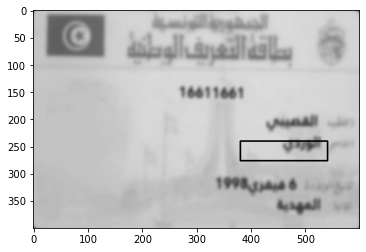

In [29]:
plt.imshow(img_roi_copy)

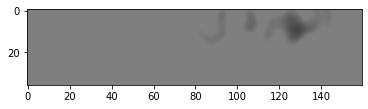

In [30]:
plt.imshow(img_firstname_chi)

In [31]:
FName = pytesseract.image_to_string(img_firstname_chi, lang='ara')

In [32]:
FName

''

In [33]:
dim_Birthdate_chi = (x, y, w, h) = (250, 310, 246, 43)
img_Birthdate_chi = imS[y:y+h, x:x+w]
img_Birthdate_chi = cv2.GaussianBlur(img_Birthdate_chi, (3,3), 0)
ret, img_Birthdate_chi = cv2.threshold(img_Birthdate_chi,127,255,cv2.THRESH_TRUNC)

In [34]:
img_roi_copy = imS.copy()
img_roi_copy = cv2.rectangle(img_roi_copy, (x, y), (x + w ,y + h),(0,0,0),2)

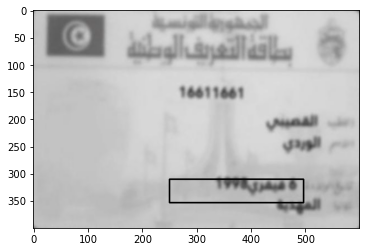

In [35]:
plt.imshow(img_roi_copy)


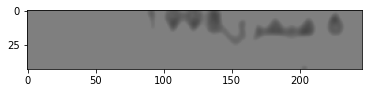

In [36]:
plt.imshow(img_Birthdate_chi)

In [37]:
YB = pytesseract.image_to_string(img_Birthdate_chi, lang='ara')

In [38]:
YB

'فيه غ998\n'

In [39]:
characters = "\n"

for x in range(len(characters)):
    YB = YB.replace(characters[x],"")
YB

'فيه غ998'

# extraction front Carte Grise

(400, 600, 3)

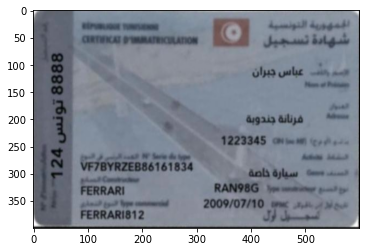

In [40]:
imS = cv2.resize(imageFrontCG, (600,400))
plt.imshow(imS)
imS.shape

In [41]:
dim_mrz = (x, y, w, h) = (300, 310, 130, 30)
img_roi_copy = cv2.rectangle(imS, (x, y), (x + w ,y + h),(0,0,0),2)

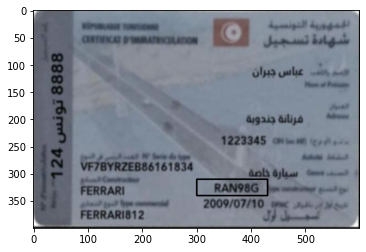

In [42]:
plt.imshow(img_roi_copy)

In [43]:
img_toc = img_roi_copy[y:y+h, x:x+w]
img_toc = cv2.GaussianBlur(img_toc, (3,3), 0)
ret, img_toc = cv2.threshold(img_toc,127,255,cv2.THRESH_TRUNC)

In [44]:
TOC = pytesseract.image_to_string(img_toc, lang='eng')
characters = "\n"

for x in range(len(characters)):
    TOC = TOC.replace(characters[x],"")

In [45]:
TOC

'RAN986G'

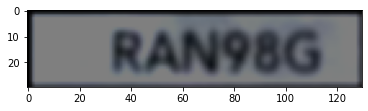

In [46]:
plt.imshow(img_toc)

In [47]:
dim_constructor = (x, y, w, h) = (80, 315, 160, 30)
img_constructor = cv2.rectangle(imS, (x, y), (x + w ,y + h),(0,0,0),2)

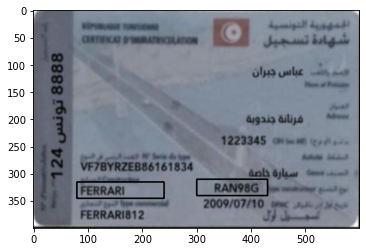

In [48]:
plt.imshow(img_constructor)

In [49]:
img_constructor = img_roi_copy[y:y+h, x:x+w]
img_constructor =cv2.GaussianBlur(img_constructor, (3,3), 0)
ret, img_constructor = cv2.threshold(img_constructor,127,255,cv2.THRESH_TRUNC)

In [50]:
constructor = pytesseract.image_to_string(img_constructor, lang='eng')

In [51]:
characters = "\n"

for x in range(len(characters)):
    constructor = constructor.replace(characters[x],"")
constructor

'FERRARI'

In [52]:
dim_tc = (x, y, w, h) = (73, 365, 168, 25)
img_tc = cv2.rectangle(imS, (x, y), (x + w ,y + h),(0,0,0),2)

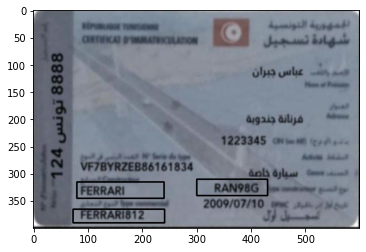

In [53]:
plt.imshow(img_tc)

In [54]:
img_tc = img_roi_copy[y:y+h, x:x+w]
img_tc =cv2.GaussianBlur(img_tc, (3,3), 0)
ret, img_tc = cv2.threshold(img_tc,127,255,cv2.THRESH_TRUNC)

In [55]:
tc = pytesseract.image_to_string(img_tc, lang='eng')

In [56]:
characters = "\n"

for x in range(len(characters)):
    tc = tc.replace(characters[x],"")
    tc

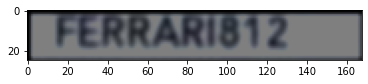

In [57]:
plt.imshow(img_tc)

In [58]:
dim_release = (x, y, w, h) = (300, 340, 130, 28)
img_release = cv2.rectangle(imS, (x, y), (x + w ,y + h),(0,0,0),2)

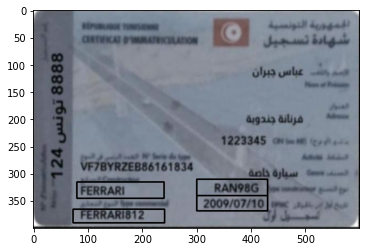

In [59]:
plt.imshow(img_release)

In [60]:
img_release = img_roi_copy[y:y+h, x:x+w]
img_release =cv2.GaussianBlur(img_release, (3,3), 0)
ret, img_release = cv2.threshold(img_release,127,255,cv2.THRESH_TRUNC)

In [61]:
release = pytesseract.image_to_string(img_release, lang='eng')

In [62]:
characters = "\n"

for x in range(len(characters)):
    release = release.replace(characters[x],"")
release

''

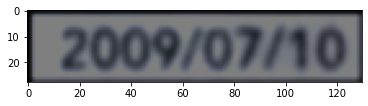

In [63]:
plt.imshow(img_release)

In [64]:
dim_SN = (x, y, w, h) = (80, 275, 220, 30)
img_SN = cv2.rectangle(imS, (x, y), (x + w ,y + h),(0,0,0),2)

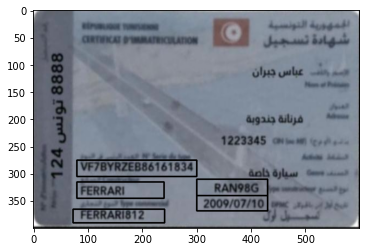

In [65]:
plt.imshow(img_SN)

In [66]:
img_SN = img_roi_copy[y:y+h, x:x+w]
img_SN =cv2.GaussianBlur(img_SN, (3,3), 0)
ret, img_SN = cv2.threshold(img_SN,127,255,cv2.THRESH_TRUNC)

In [67]:
SN = pytesseract.image_to_string(img_SN, lang='eng')

In [68]:
characters = "\n"

for x in range(len(characters)):
    SN = SN.replace(characters[x],"")
SN

'VF7BYRZEB86161834'

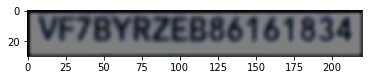

In [69]:
plt.imshow(img_SN)

In [70]:
dim_RL = (x, y, w, h) = (15, 230, 50, 170)
img_RL = cv2.rectangle(imS, (x, y), (x + w ,y + h),(0,0,0),2)

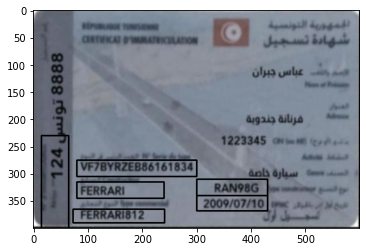

In [71]:
plt.imshow(img_RL)

In [72]:
img_RL = img_roi_copy[y:y+h, x:x+w]
img_RL =cv2.GaussianBlur(img_RL, (3,3), 0)
ret, img_RL = cv2.threshold(img_RL,127,255,cv2.THRESH_TRUNC)

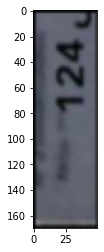

In [73]:
plt.imshow(img_RL)

In [74]:
img_RL_rot = cv2.rotate(img_RL, cv2.ROTATE_90_CLOCKWISE)

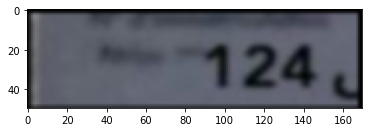

In [75]:
plt.imshow(img_RL_rot)

In [76]:
RL = pytesseract.image_to_string(img_RL_rot, config = '--psm 12')

In [77]:
characters = "\n"

for x in range(len(characters)):
    RL = RL.replace(characters[x],"")
RL

'124'

In [78]:
dim_RR = (x, y, w, h) = (20, 20, 50, 160)
img_RR = cv2.rectangle(imS, (x, y), (x + w ,y + h),(0,0,0),2)

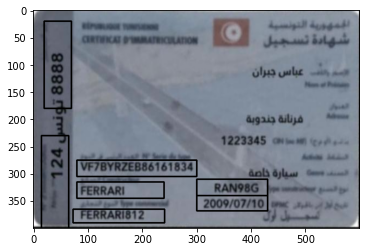

In [79]:
plt.imshow(img_RR)

In [80]:
img_RR = img_roi_copy[y:y+h, x:x+w]
img_RR =cv2.GaussianBlur(img_RR, (3,3), 0)
ret, img_RL = cv2.threshold(img_RR,127,255,cv2.THRESH_TRUNC)

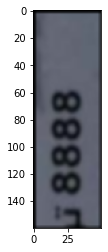

In [81]:
plt.imshow(img_RR)

In [82]:
img_RR_rot = cv2.rotate(img_RR, cv2.ROTATE_90_CLOCKWISE)

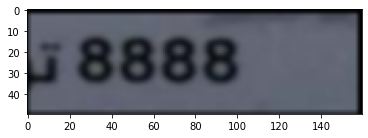

In [83]:
plt.imshow(img_RR_rot)

In [84]:
RR = pytesseract.image_to_string(img_RR_rot, config = '--psm 8')

In [85]:
characters = "\n"

for x in range(len(characters)):
    RR = RR.replace(characters[x],"")
RR

'isses'

In [86]:
RR = numberinstring(RR)

In [87]:
RR

''

# extraction back Carte Grise

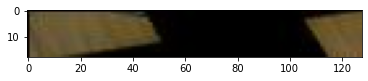

In [88]:
plt.imshow(imageBackCG)

(400, 600, 3)

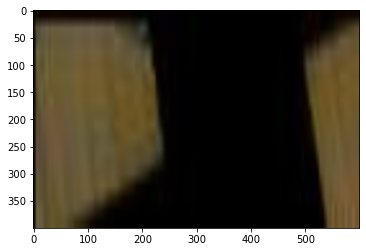

In [89]:
imS = cv2.resize(imageBackCG, (600,400))                    # Resize image
plt.imshow(imS)
imS.shape

In [90]:
img = imS

In [91]:
img_copy = imS.copy()
img_canny = cv2.Canny(img_copy, 50, 100, apertureSize = 3)
img_hough = cv2.HoughLinesP(img_canny, 1, math.pi / 180, 100, minLineLength = 100, maxLineGap = 10)

In [92]:
img_hough = cv2.HoughLinesP(img_canny, 1, math.pi / 180, 100, minLineLength = 100, maxLineGap = 10)

In [93]:
#(x, y, w, h) = (np.amin(img_hough, axis = 0)[0,0], np.amin(img_hough, axis = 0)[0,1], np.amax(img_hough, axis = 0)[0,0] - np.amin(img_hough, axis = 0)[0,0], np.amax(img_hough, axis = 0)[0,1] - np.amin(img_hough, axis = 0)[0,1])
img_roi = img_copy[y:y+h,x:x+w]

In [94]:
dim_Doors_chi = (x, y, w, h) = (380,25, 125, 26)
img_Doors_chi = imS[y:y+h, x:x+w]
img_Doors_chi = cv2.GaussianBlur(img_Doors_chi, (3,3), 0)
ret, img_Doors_chi = cv2.threshold(img_Doors_chi,127,255,cv2.THRESH_TRUNC)

In [95]:
img_roi_copy = imS.copy()
img_roi_copy = cv2.rectangle(img_roi_copy, (x, y), (x + w ,y + h),(0,0,0),2)

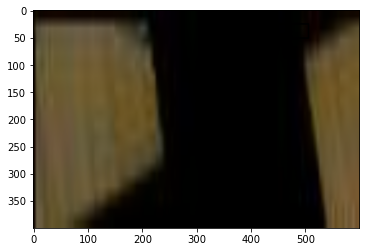

In [96]:
plt.imshow(img_roi_copy)

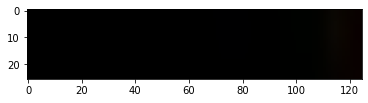

In [97]:
plt.imshow(img_Doors_chi)

In [98]:
Body = pytesseract.image_to_string(img_Doors_chi, lang='ara')

In [99]:
Body

''

In [100]:
dim_Cylindre_chi = (x, y, w, h) = (120,70, 90, 30)
img_Cylindre_chi = imS[y:y+h, x:x+w]
img_Cylindre_chi = cv2.GaussianBlur(img_Cylindre_chi, (3,3), 0)
ret, img_Cylindre_chi = cv2.threshold(img_Cylindre_chi,127,255,cv2.THRESH_TRUNC)

In [101]:
img_roi_copy = imS.copy()
img_roi_copy = cv2.rectangle(img_roi_copy, (x, y), (x + w ,y + h),(0,0,0),2)

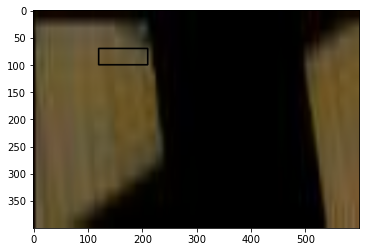

In [102]:
plt.imshow(img_roi_copy)

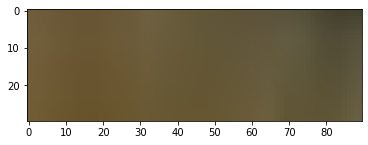

In [103]:
plt.imshow(img_Cylindre_chi)

In [104]:
NA = pytesseract.image_to_string(img_Cylindre_chi, lang='ara')

In [105]:
NA

''

In [106]:
#we only extracted the numbers with the method below
NA = numberinstring(NA)

In [107]:
NA

''

In [108]:
#we limited the area  to extract the fiscal power of the car
dim_FP_chi = (x, y, w, h) = (430,67, 80, 27)
img_FP_chi = imS[y:y+h, x:x+w]
img_FP_chi = cv2.GaussianBlur(img_FP_chi, (3,3), 0)
ret, img_FP_chi = cv2.threshold(img_FP_chi,127,255,cv2.THRESH_TRUNC)

In [109]:
img_roi_copy = imS.copy()
img_roi_copy = cv2.rectangle(img_roi_copy, (x, y), (x + w ,y + h),(0,0,0),2)

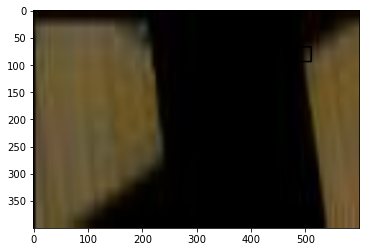

In [110]:
plt.imshow(img_roi_copy)

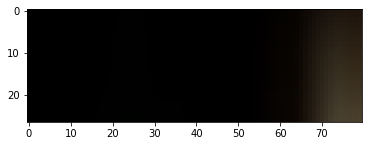

In [111]:
plt.imshow(img_FP_chi)

In [112]:
FP = pytesseract.image_to_string(img_FP_chi, config = '--psm 12')

In [113]:
FP

''

In [114]:
FP=numberinstring(FP)

In [115]:
FP

''

In [116]:
if FP == '':
    FP = 0
    

In [117]:
FP

0

In [118]:
dim_EW_chi = (x, y, w, h) = (420,90, 160, 27)
img_EW_chi = imS[y:y+h, x:x+w]
img_EW_chi = cv2.GaussianBlur(img_EW_chi, (3,3), 0)
ret, img_EW_chi = cv2.threshold(img_EW_chi,127,255,cv2.THRESH_TRUNC)

In [119]:
img_roi_copy = imS.copy()
img_roi_copy = cv2.rectangle(img_roi_copy, (x, y), (x + w ,y + h),(0,0,0),2)

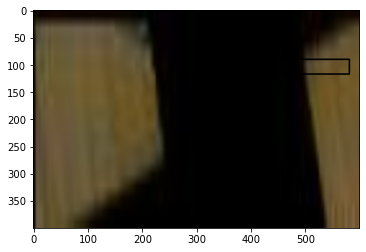

In [120]:
plt.imshow(img_roi_copy)

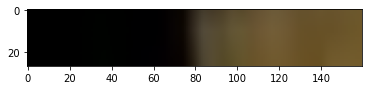

In [121]:
plt.imshow(img_EW_chi)

In [122]:
EW = pytesseract.image_to_string(img_EW_chi, config = '--psm 12')

In [123]:
EW

''

In [124]:
EW=numberinstring(EW)

In [125]:
EW

''

# Filling the database after extraction

In [126]:
df = df.append({'CIN number':Cin_num,'First Name':FName,'Last Name':LName,'Year of Birth':YB,
                           'Body':Body,'Fiscal Power':FP,'Empty weight':EW,'Number of axies':NA,
                           'Registration right':RR,'Registration left':RL,'Constructor':tc,'Commercial Type':tc,
                           'Serial Number':SN,'Release':release,'Type of constructor':TOC}, ignore_index=True)

<ipython-input-126-abd12b00d547>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'CIN number':Cin_num,'First Name':FName,'Last Name':LName,'Year of Birth':YB,


In [5422]:
df

,CIN number,First Name,Last Name,Year of Birth,Body,Fiscal Power,Empty weight,Number of axies,Registration right,Registration left,Constructor,Commercial Type,Serial Number,Release,Type of constructor
0,11827636,,"صوة\n\n""3\n",ا تويلية ‎١777‏,ذات اربع ابواب\n,0,31123.0,,,,,,,NaT,
1,11800502,,,ع مار س ‎١770‏,,0,1300.0,,465,,,,WVW2ZZZBBZ3ZE08 30,2019-05-13 00:00:00,| BGS |
2,9090909,الميبصو رن\n,الأ ب\n,د أوبد7,ات صر لاب\n\n,0,308.0,4,,,,,,NaT,
3,12365479,,بن براهيم\n,؟ سسمر نانانا,ذاب اربع اباب\n,0,,,76002,163,jnani,jnani,VW2ZZZBBZ3ZE0830,2021-07-15 00:00:00,R612C4
4,23581232,هر 7\n,,١7234 ‏اهريل‎ 8#,,0,08,,59505,,,,MOGFF33F337F09721,NaT,UPKree
5,21060%2,|التصسي «لة\n,,"9,71ريل",داب اربع ابواب\n,0,0954,7,,,,,,NaT,
6,25045806,لبر ني\n,,"""ا يوان 9؟ ‎١‏",داب اربع ‎١١‏\n,0,1127,7,,,,,,aorerrerte,oar
7,23123822,,,فارس اننا,ذاب اربع ابواب\n,0,1127,,41600,169,nan,nan,WBAXG112 30DY8360,2001/12/21,
8,22831307,,,3 انمهي؟؟ 1,ذات بابين\n,0,1047,,38089,"""170,",,,KNABX516AFT861198,2002/01/10,TAS78K361
9,2067899,,عبدو\n\nفععطالل\n,١747 ‏تويليةه‎ +,ذل اريم فؤالف.\n,0,1,,54375,"| 146,",,,NBMCBAD 1GU90 266,,


Export the database after extraction

In [5443]:
df.to_excel('BDPIextract.xlsx')

# Import the correct database for evaluation

In [132]:
import pandas as pd
datasetimag = pd.read_excel (r'BDPI_manuelle.xlsx')

In [133]:
#diplaying the dataset information
datasetimag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CIN number           40 non-null     int64  
 1   First Name           40 non-null     object 
 2   Last Name            40 non-null     object 
 3   Year of birth        40 non-null     object 
 4   Body                 38 non-null     object 
 5   Fiscal Power         33 non-null     float64
 6   Energy               40 non-null     object 
 7   Empty weight         34 non-null     float64
 8   Number of axies      35 non-null     float64
 9   Registration left    38 non-null     float64
 10  Registration right   37 non-null     float64
 11  Address              33 non-null     object 
 12  Constructor          39 non-null     object 
 13  Commercial Type      18 non-null     object 
 14  Serial Number        30 non-null     object 
 15  Type of constructor  25 non-null     objec

In [134]:
#df["Fiscal Power"] = df["Fiscal Power"].astype(str).astype(np.int64)

In [135]:
print(datasetimag.shape)

(40, 16)


In [136]:
datasetimag.head()

,CIN number,First Name,Last Name,Year of birth,Body,Fiscal Power,Energy,Empty weight,Number of axies,Registration left,Registration right,Address,Constructor,Commercial Type,Serial Number,Type of constructor
0,11827636,أشرف,صوة,1 جويلية 1999,ذات أربعة أبواب,5.0,بنزين,1.123,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11800502,أبان,الجليلي,2 مارس 1996,ذات أربعة أبواب,7.0,بنزين,1.100,6.0,161.0,465.0,رواد أريانة,VOLKSWAGEN,PASSAT,WVWZZZBBZ3ZE083066,BG4
2,9090909,الفيتوري,لميا,5 أوت 1995,ذات أربعة أبواب,5.0,بنزين,1.204,4.0,162.0,8564.0,الزهراء بن عروس,ISUZU,NaN,NaN,NaN
3,123456789,عزيز,بن براهيم,9 سبتمبر 2000,ذات أربعة أبواب,9.0,بنزين,1.075,8.0,163.0,6002.0,بْر الحفي سيدي بوزيد,VOLKSWAGEN,NaN,VWZZZBBZ3ZE083066,R612C4
4,23581232,طراد,ادم,8 أفريل 1954,ذات بابان,8.0,بنزين,0.897,6.0,164.0,9505.0,حي الخضراء تونس,BENTLEY,NaN,MDBFF33F337F09721,LFKF89


# Import the database of the extracted data

In [143]:
import pandas as pd
df = pd.read_excel (r'BDPIextract.xlsx')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CIN number           40 non-null     object 
 1   First Name           10 non-null     object 
 2   Last Name            20 non-null     object 
 3   Year of Birth        40 non-null     object 
 4   Body                 29 non-null     object 
 5   Fiscal Power         40 non-null     int64  
 6   Empty weight         29 non-null     float64
 7   Number of axies      6 non-null      float64
 8   Registration right   27 non-null     float64
 9   Registration left    18 non-null     object 
 10  Constructor          7 non-null      object 
 11  Commercial Type      7 non-null      object 
 12  Serial Number        21 non-null     object 
 13  Release              17 non-null     object 
 14  Type of constructor  21 non-null     object 
dtypes: float64(3), int64(1), object(11)
memory

# Model evaluation by comparing the correct database and the extracted database

In [145]:
pd.__version__

'1.4.2'

In [146]:
#df.compare(datasetimag)

In [147]:
df_all = pd.concat([df.set_index('CIN number'), datasetimag.set_index('CIN number')], 
                   axis='columns', keys=['Modele', 'Manuelle'])
df_all

Modele                                                   \
              First Name    Last Name     Year of Birth              Body   
CIN number                                                                  
11827636             NaN  صوة\n\n"3\n   ا تويلية ‎١777‏  ذات اربع ابواب\n   
11800502             NaN          NaN    ع مار س ‎١770‏               NaN   
9090909     الميبصو رن\n      الأ ب\n           د أوبد7     ات صر لاب\n\n   
12365479             NaN  بن براهيم\n     ؟ سسمر نانانا   ذاب اربع اباب\n   
23581232          هر 7\n          NaN  ١7234 ‏اهريل‎ 8#               NaN   
...                  ...          ...               ...               ...   
26164002             NaN          NaN               NaN               NaN   
29395541             NaN          NaN               NaN               NaN   
148899               NaN          NaN               NaN               NaN   
12211221             NaN          NaN               NaN               NaN   
16611661             NaN          NaN               NaN               NaN   

                                                                         \
           Fiscal Power Empty weight Number of axies Registration right   
CIN number                                                                
11827636            0.0      31123.0             NaN                NaN   
11800502            0.0       1300.0             NaN              465.0   
9090909             0.0        308.0             4.0                NaN   
12365479            0.0          NaN             NaN            76002.0   
23581232            0.0          8.0             NaN            59505.0   
...                 ...          ...             ...                ...   
26164002            NaN          NaN             NaN                NaN   
29395541            NaN          NaN             NaN                NaN   
148899              NaN          NaN             NaN                NaN   
12211221            NaN          NaN             NaN                NaN   
16611661            NaN          NaN             NaN                NaN   

                                          ... Manuelle               \
           Registration left Constructor  ...   Energy Empty weight   
CIN number                                ...                         
11827636                 NaN         NaN  ...    بنزين        1.123   
11800502                 NaN         NaN  ...    بنزين        1.100   
9090909                  NaN         NaN  ...    بنزين        1.204   
12365479                 163       jnani  ...      NaN          NaN   
23581232                 NaN         NaN  ...      NaN          NaN   
...                      ...         ...  ...      ...          ...   
26164002                 NaN         NaN  ...    بنزين       13.260   
29395541                 NaN         NaN  ...    بنزين          NaN   
148899                   NaN         NaN  ...    بنزين          NaN   
12211221                 NaN         NaN  ...    بنزين          NaN   
16611661                 NaN         NaN  ...    بنزين        2.000   

                                                                 \
           Number of axies Registration left Registration right   
CIN number                                                        
11827636               3.0               NaN                NaN   
11800502               6.0             161.0              465.0   
9090909                4.0             162.0             8564.0   
12365479               NaN               NaN                NaN   
23581232               NaN               NaN                NaN   
...                    ...               ...                ...   
26164002               3.0             120.0             6969.0   
29395541               NaN             121.0             6802.0   
148899                 NaN             122.0             5790.0   
12211221               NaN             123.0             4521.0   
16611661              

In [148]:
#swap the column levels and put the same column names next to each other:
df_final = df_all.swaplevel(axis='columns')[df.columns[1:]]
df_final

First Name              Last Name              Year of Birth  \
                  Modele  Manuelle       Modele Manuelle            Modele   
CIN number                                                                   
11827636             NaN     أشرف   صوة\n\n"3\n      صوة   ا تويلية ‎١777‏   
11800502             NaN      أبان          NaN  الجليلي    ع مار س ‎١770‏   
9090909     الميبصو رن\n  الفيتوري      الأ ب\n     لميا           د أوبد7   
12365479             NaN       NaN  بن براهيم\n      NaN     ؟ سسمر نانانا   
23581232          هر 7\n       NaN          NaN      NaN  ١7234 ‏اهريل‎ 8#   
...                  ...       ...          ...      ...               ...   
26164002             NaN     دريدي          NaN     زاهر               NaN   
29395541             NaN     عياري          NaN    شادية               NaN   
148899               NaN     رانية          NaN   رحماني               NaN   
12211221             NaN      نهلة          NaN  العياري               NaN   
16611661             NaN    الوردي          NaN  القصيني               NaN   

                        Body                  Fiscal Power           \
                      Modele         Manuelle       Modele Manuelle   
CIN number                                                            
11827636    ذات اربع ابواب\n  ذات أربعة أبواب          0.0      5.0   
11800502                 NaN  ذات أربعة أبواب          0.0      7.0   
9090909        ات صر لاب\n\n  ذات أربعة أبواب          0.0      5.0   
12365479     ذاب اربع اباب\n              NaN          0.0      NaN   
23581232                 NaN              NaN          0.0      NaN   
...                      ...              ...          ...      ...   
26164002                 NaN      كاملة معدات          NaN      NaN   
29395541                 NaN    مسطح ذو جوانب          NaN      NaN   
148899                   NaN  ذات أربعة أبواب          NaN      NaN   
12211221                 NaN  ذات أربعة أبواب          NaN      5.0   
16611661                 NaN    مسطح ذو جوانب          NaN      NaN   

           Empty weight  ... Registration left Constructor              \
                 Modele  ...          Manuelle      Modele    Manuelle   
CIN number               ...                                             
11827636        31123.0  ...               NaN         NaN         NaN   
11800502         1300.0  ...             161.0         NaN  VOLKSWAGEN   
9090909           308.0  ...             162.0         NaN       ISUZU   
12365479            NaN  ...               NaN       jnani         NaN   
23581232            8.0  ...               NaN         NaN         NaN   
...                 ...  ...               ...         ...         ...   
26164002            NaN  ...             120.0         NaN        CLIO   
29395541            NaN  ...             121.0         NaN     CITROEN   
148899              NaN  ...             122.0         NaN        AUDI   
12211221            NaN  ...             123.0         NaN        GOLF   
16611661            NaN  ...             124.0         NaN     FERRARI   

           Commercial Type                   Serial Number  \
                    Modele    Manuelle              Modele   
CIN number                                                   
11827636               NaN         NaN                 NaN   
11800502               NaN      PASSAT  WVW2ZZZBBZ3ZE08 30   
9090909                NaN         NaN                 NaN   
12365479             jnani         NaN    VW2ZZZBBZ3ZE0830   
23581232               NaN         NaN   MOGFF33F337F09721   
...                    ...         ...                 ...   
26164002               NaN       CLIO4                 NaN   
29395541               NaN          C3                 NaN   
148899                 NaN          A3                 NaN   
12211221               NaN        GOLF                 NaN   
16611661               NaN  FERRARI812                 NaN   

                    

Now, its much easier to spot the differences in the frames. But, we can go further and use the style property to highlight the cells that are different. 
We define a custom function

In [149]:
def highlight_diff(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    other = data.xs('Modele', axis='columns', level=-1)
    return pd.DataFrame(np.where(data.ne(other, level=0), attr, ''),
                        index=data.index, columns=data.columns)

df_final.style.apply(highlight_diff, axis=None)

In [150]:
df_final.shape

(77, 26)

deja 77 ligne > 40 : maaneha barcha des num CIN khdhew ligne wahadhom puisque mech kifkif

Comparaison des colonnes CIN des 2 bases

In [151]:
df['CIN number'].equals(datasetimag['CIN number'])

False

In [152]:
df['Difference CIN'] = np.where( df['CIN number'] == datasetimag['CIN number'] , 'Same', 'Different')

In [153]:
df['Difference CIN']

0          Same
1          Same
2          Same
3     Different
4     Different
5     Different
6     Different
7     Different
8     Different
9     Different
10    Different
11    Different
12    Different
13    Different
14    Different
15    Different
16    Different
17    Different
18    Different
19    Different
20    Different
21    Different
22    Different
23    Different
24    Different
25    Different
26    Different
27    Different
28    Different
29    Different
30    Different
31    Different
32    Different
33    Different
34    Different
35    Different
36    Different
37    Different
38    Different
39    Different
Name: Difference CIN, dtype: object

In [154]:
df['Difference CIN'].describe()

count            40
unique            2
top       Different
freq             37
Name: Difference CIN, dtype: object

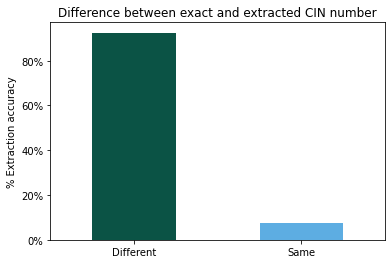

In [155]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#0B5345','#5DADE2']
ax = (df['Difference CIN'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% ')
ax.set_xlabel('')
ax.set_ylabel('% Extraction accuracy')
ax.set_title('Difference between exact and extracted CIN number')

#creattion de la liste
totals = []

#trouver les valeurs et les ajouter dans la liste
for i in ax.patches:
    totals.append

Comparaison of the 'First Name' column between the extracted and the correct data

In [156]:
df['First Name'].equals(datasetimag['First Name'])

False

In [157]:
df['Difference First Name'] = np.where( df['First Name'] == datasetimag['First Name'] , 'Same', 'Different')

In [158]:
df['First Name']

0               NaN
1               NaN
2      الميبصو رن\n
3               NaN
4            هر 7\n
5     |التصسي «لة\n
6          لبر ني\n
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16           تحت(\n
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27       الل مي 2\n
28              NaN
29              NaN
30         نز ناي\n
31        ال دايا\n
32              NaN
33              NaN
34              NaN
35           ريدن\n
36         جار ني\n
37              NaN
38              NaN
39              NaN
Name: First Name, dtype: object

In [159]:
df['Difference First Name'].describe()

count            40
unique            1
top       Different
freq             40
Name: Difference First Name, dtype: object

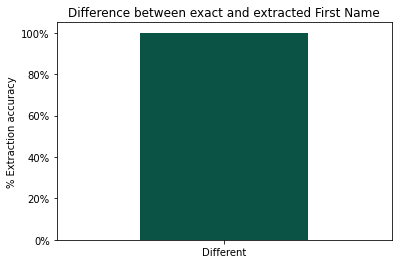

In [160]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#0B5345','#5DADE2']
ax = (df['Difference First Name'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% ')
ax.set_xlabel('')
ax.set_ylabel('% Extraction accuracy')
ax.set_title('Difference between exact and extracted First Name')

#creattion de la liste
totals = []

#trouver les valeurs et les ajouter dans la liste
for i in ax.patches:
    totals.append

Comparaison of the 'Last Name' column between the extracted and the correct data

In [161]:
df['Last Name'].equals(datasetimag['Last Name'])

False

In [162]:
df['Difference Last Name'] = np.where( df['Last Name'] == datasetimag['Last Name'] , 'Same', 'Different')

In [163]:
df['Last Name']

0            صوة\n\n"3\n
1                    NaN
2                الأ ب\n
3            بن براهيم\n
4                    NaN
5                    NaN
6                    NaN
7                    NaN
8                    NaN
9      عبدو\n\nفععطالل\n
10                عومد\n
11                   NaN
12                كمون\n
13      بن عمار\n\n- 1\n
14       بوعزيز\n\nقدو\n
15            ذوادي\nل\n
16               مبارك\n
17    عبد الله\n\nالوذ\n
18                 ادك\n
19                   NaN
20                   NaN
21                   NaN
22    بن عايد\n\nاخ فو\n
23                   NaN
24        زريبي\n\nواي\n
25                   NaN
26         ملاك\n\nدنا\n
27                 !وى\n
28                   NaN
29                   NaN
30                زهرة\n
31                   NaN
32               نادين\n
33                   NaN
34                   NaN
35                زاهر\n
36                   NaN
37                   NaN
38                 مقع\n
39                   NaN


In [164]:
df['Difference Last Name'].describe()

count            40
unique            1
top       Different
freq             40
Name: Difference Last Name, dtype: object

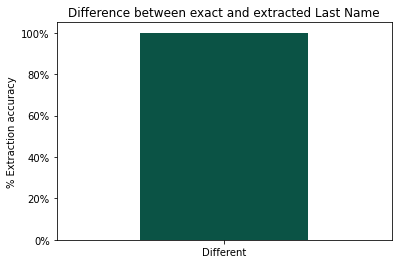

In [165]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#0B5345','#5DADE2']
ax = (df['Difference Last Name'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% ')
ax.set_xlabel('')
ax.set_ylabel('% Extraction accuracy')
ax.set_title('Difference between exact and extracted Last Name')

#creattion de la liste
totals = []

#trouver les valeurs et les ajouter dans la liste
for i in ax.patches:
    totals.append

Comparaison of the 'Body' column between the extracted and the correct data

In [170]:
df['Body'].equals(datasetimag['Body'])

False

In [171]:
df['Difference Body'] = np.where( df['Body'] == datasetimag['Body'] , 'Same', 'Different')

In [172]:
df['Difference Body']

0     Different
1     Different
2     Different
3     Different
4     Different
5     Different
6     Different
7     Different
8     Different
9     Different
10    Different
11    Different
12    Different
13    Different
14    Different
15    Different
16    Different
17    Different
18    Different
19    Different
20    Different
21    Different
22    Different
23    Different
24    Different
25    Different
26    Different
27    Different
28    Different
29    Different
30    Different
31    Different
32    Different
33    Different
34    Different
35    Different
36    Different
37    Different
38    Different
39    Different
Name: Difference Body, dtype: object

In [173]:
df['Difference Body'].describe()

count            40
unique            1
top       Different
freq             40
Name: Difference Body, dtype: object

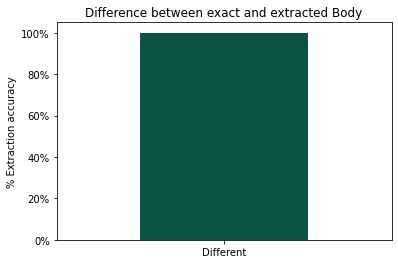

In [174]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#0B5345','#5DADE2']
ax = (df['Difference Body'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% ')
ax.set_xlabel('')
ax.set_ylabel('% Extraction accuracy')
ax.set_title('Difference between exact and extracted Body')

#creattion de la liste
totals = []

#trouver les valeurs et les ajouter dans la liste
for i in ax.patches:
    totals.append